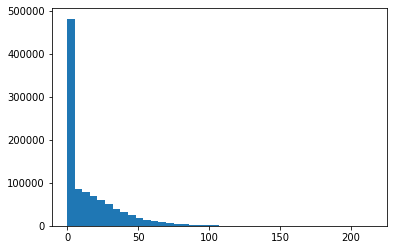

Final analytical call price is 14.946952086608091 +- 1.986479525243295e-05
Final euler call price is 14.966022244721765 +- 1.990023976806865e-05
Final analytical put price is 5.455006567235058 +- 9.190124662872058e-06
Final euler put price is 5.467206013048039 +- 9.215952848618642e-06


In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt

call_an, call_eu, put_an, put_eu = np.loadtxt("third.dat", unpack=True)
plt.hist(call_an, bins=40)
plt.show()
print("Final analytical call price is",np.average(call_an), "+-", np.std(call_an)/len(call_an))
print("Final euler call price is",np.average(call_eu), "+-", np.std(call_eu)/len(call_an))
print("Final analytical put price is",np.average(put_an), "+-", np.std(put_an)/len(call_an))
print("Final euler put price is",np.average(put_eu), "+-", np.std(put_eu)/len(call_an))

Abbiamo mostrato un istogramma dei prezzi di call ottenuti tramite il singolo step analitico per l'evoluzione del sottostante come check di consistenza. Ulteriori quantità che si potrebbero valutare riguarderebbero la cosidetta put-call parity.

# Passiamo a vedere i risultati con il block averaging

qui essenzialmente abbiamo sfruttato il programma c++ solo per produrre una serie di prezzi ed abbiamo gestito la parte relativa alla statistica del problema con python

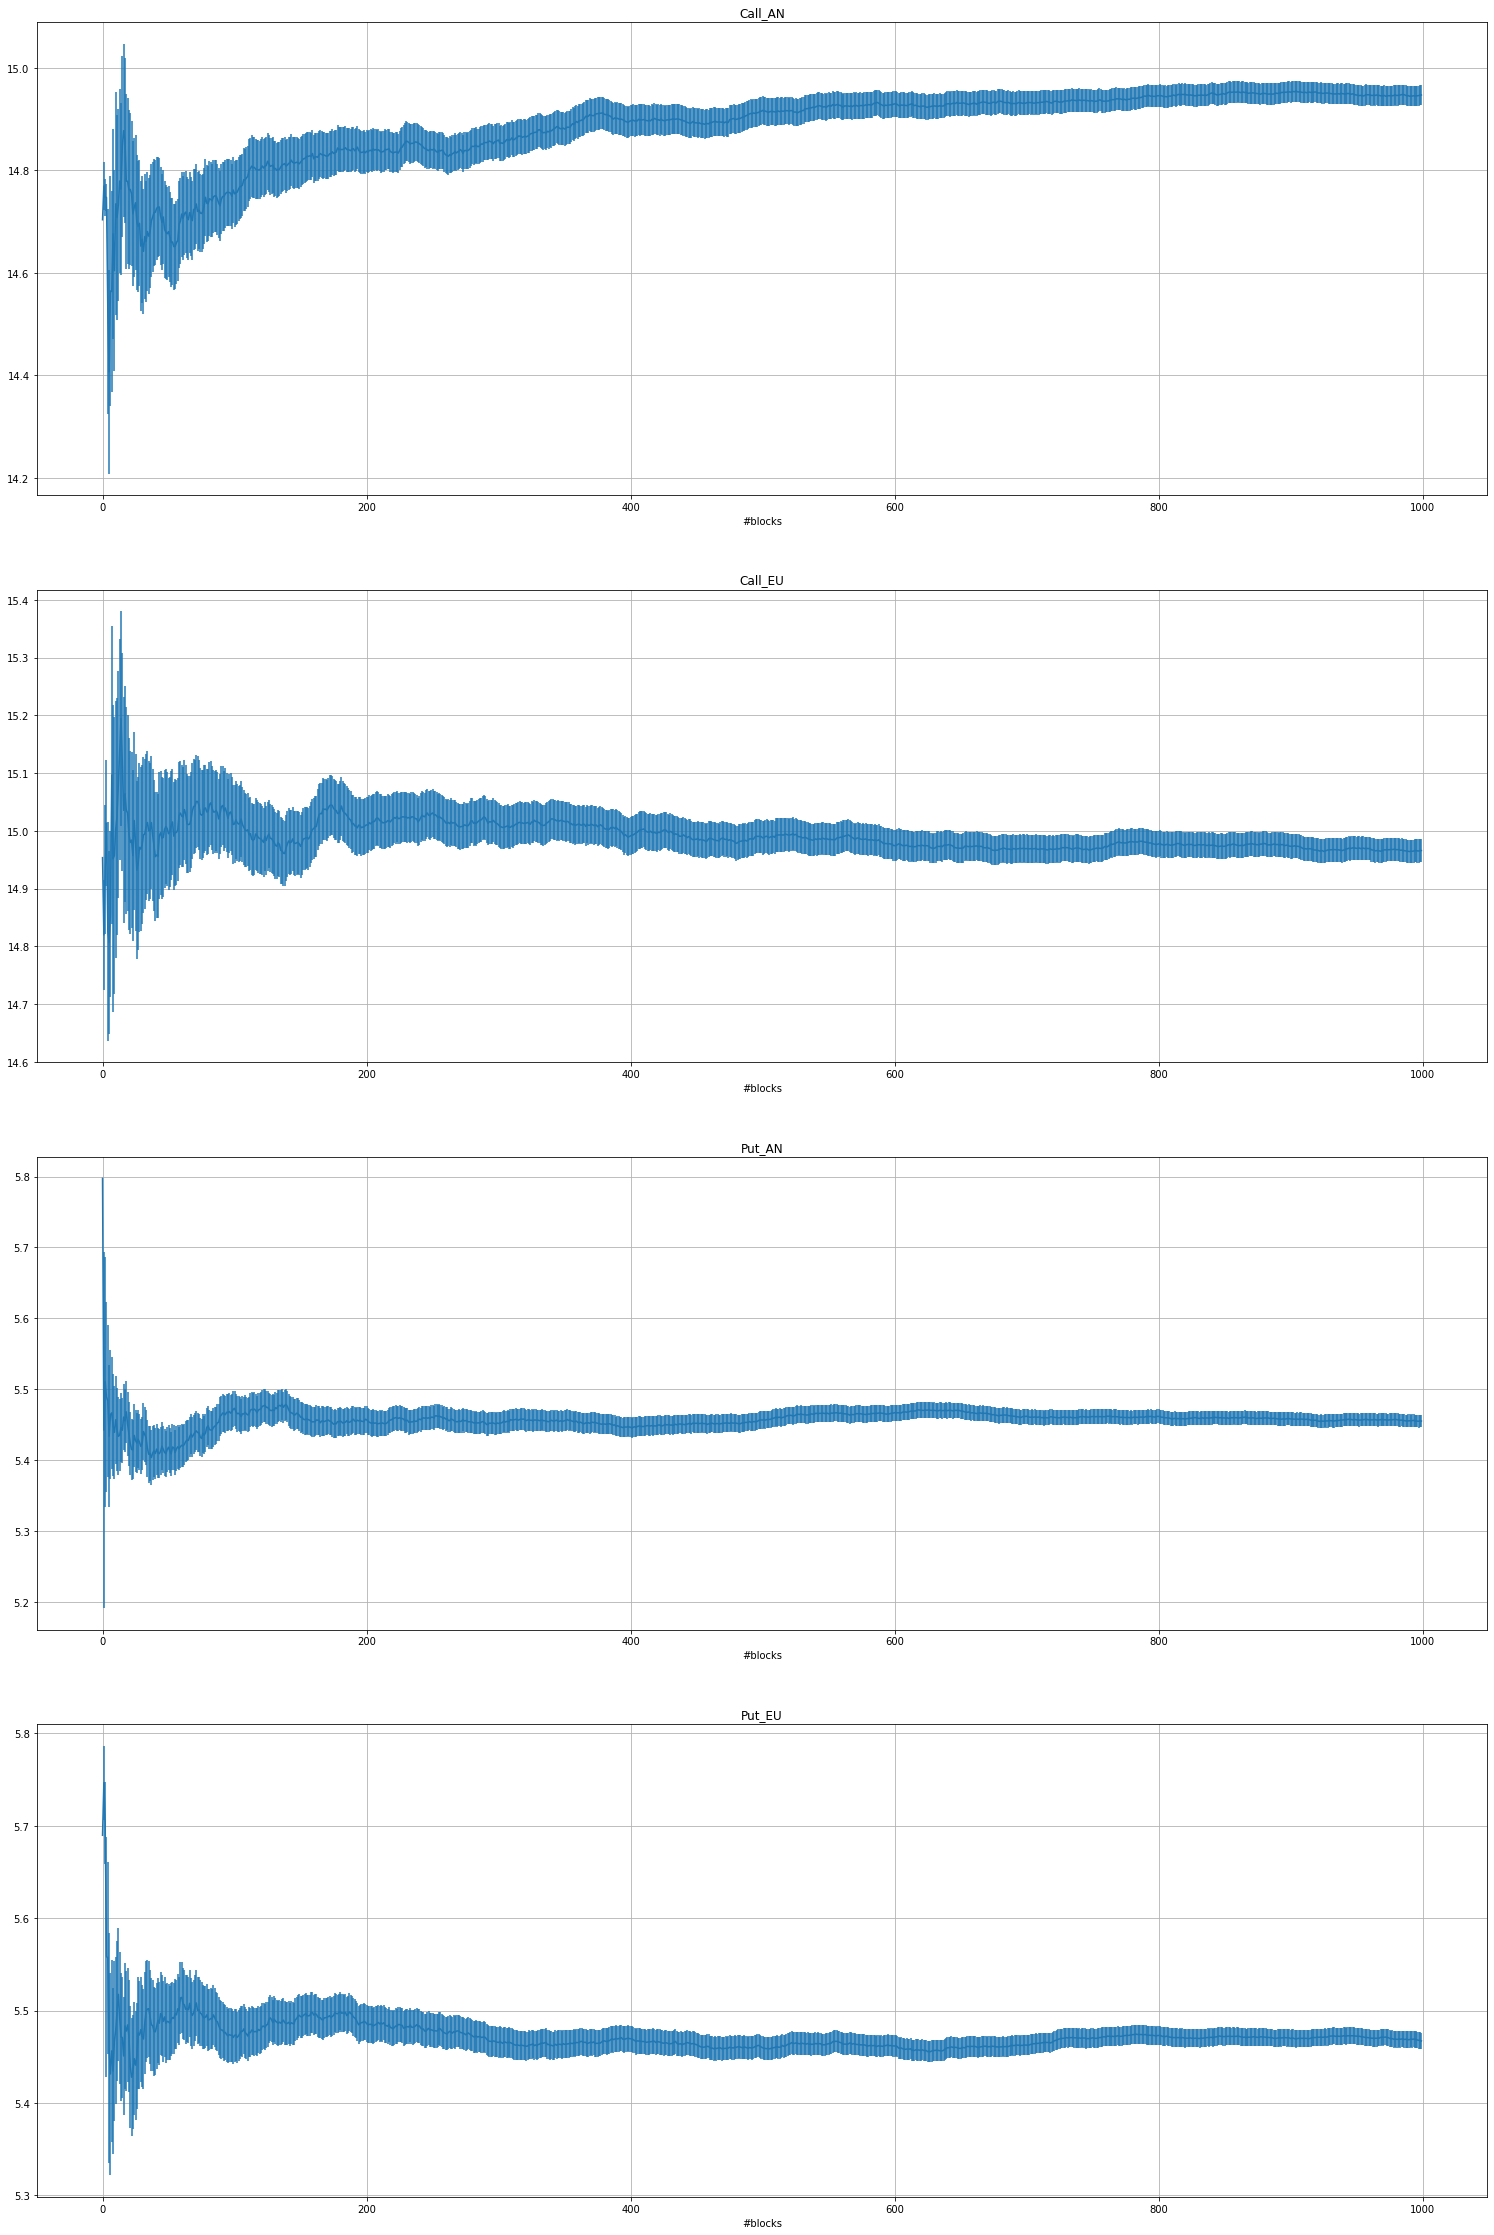

In [17]:
dati = np.loadtxt("third.dat")
ave_blk = np.zeros(4)
c = np.zeros(4)
c2 = np.zeros(4)
d = 1000
num = len(dati)//d
ave = [np.zeros(num), np.zeros(num), np.zeros(num), np.zeros(num)]
ave2 = [np.zeros(num), np.zeros(num), np.zeros(num), np.zeros(num)]
devstd = [np.zeros(num), np.zeros(num), np.zeros(num), np.zeros(num)]
steps = np.arange(num)
for j in range(4):
    for i in range(num):
        ave_blk = np.zeros(4)
        for k in range(i*d, (i+1)*d):    
            ave_blk[j] += dati[k][j]/d          #calcolo il valor medio     
        c[j] += ave_blk[j]
        c2[j] += ave_blk[j]**2
        ave[j][i] = c[j]/(i+1)
        devstd[j][i] = np.sqrt((c2[j]/(i+1) - (c[j]/(i+1))**2)/(i+1))  

f = plt.figure(figsize = (26, 40))   
text = ['Call_AN', 'Call_EU','Put_AN','Put_EU']
for i in range(4):
    f.add_subplot(4, 1, 1+i)          
    plt.errorbar(steps, ave[i], devstd[i])
    plt.xlabel('#blocks')
    plt.title(text[i])
    plt.grid()